# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv("IP1_Final.csv")
df.head()

,Initials,date,course id,time(m),summary
0,RF,1/12/2023,DS-160,15,Set up time calendar project
1,RF,1/12/2023,ACCT-318,67,Studied for Quiz
2,RF,1/12/2023,BUSA-245,42,Read chapter 2
3,RF,1/13/2023,ACCT-318,25,Took at home quiz
4,RF,1/16/2023,BUSA-245,30,Studied for Quiz


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
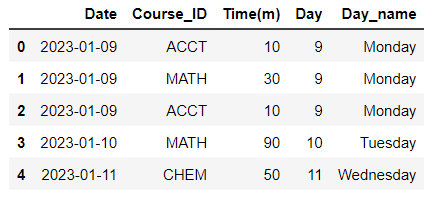

In [3]:
df.sample(10)

,Initials,date,course id,time(m),summary
16,RF,1/27/2023,ACCT-318,34,Studied for quiz 3
26,RF,2/7/2023,DS-160,51,Study for quiz
22,RF,2/5/2023,ACCT-212,74,Studied for exam 1 and practice problems
10,RF,1/20/2023,BUSA-245,20,Researched for presentation
15,RF,1/26/2023,ACCT-318,20,Studied for quiz 3
1,RF,1/12/2023,ACCT-318,67,Studied for Quiz
24,RF,2/7/2023,ACCT-441,57,Worked on case 1
23,RF,2/6/2023,ACCT-441,40,Read documents for case 1
9,RF,1/19/2023,BUSA-245,30,Worked on labs
12,RF,1/22/2023,ACCT-318,49,Studied for Quiz 2


In [4]:
df.columns

Index(['Initials', 'date', 'course id', 'time(m)', 'summary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   29 non-null     object
 1   date       29 non-null     object
 2   course id  29 non-null     object
 3   time(m)    29 non-null     int64 
 4   summary    29 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [6]:
# Is there any column you want to drop? If yes which column and why?
#Yes, I would like to drop summary and initials because the initials are all the same and there isn't much data manipulation I can do for the summaries 
df.drop(['Initials','summary'], axis=1, inplace=True)

In [7]:
df.head()

,date,course id,time(m)
0,1/12/2023,DS-160,15
1,1/12/2023,ACCT-318,67
2,1/12/2023,BUSA-245,42
3,1/13/2023,ACCT-318,25
4,1/16/2023,BUSA-245,30


In [8]:
# Convert the date column to datetime
df['date']=pd.to_datetime(df['date'])


In [9]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['date'].dt.day

In [10]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_Name']=df['date'].dt.day_name()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       29 non-null     datetime64[ns]
 1   course id  29 non-null     object        
 2   time(m)    29 non-null     int64         
 3   Day        29 non-null     int64         
 4   Day_Name   29 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ KB


### Answer the questions

In [12]:
# What is the average time you have spend for learning?
df.describe()

,time(m),Day
count,29.000000,29.000000
mean,42.448276,15.827586
std,19.745861,8.409472
min,15.000000,1.000000
25%,26.000000,9.000000
50%,37.000000,17.000000
75%,57.000000,22.000000
max,92.000000,30.000000


#### The average time I spent learning is 42.448276 minutes

In [13]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['time(m)']>42.448276)]

,date,course id,time(m),Day,Day_Name
1,2023-01-12,ACCT-318,67,12,Thursday
5,2023-01-17,BUSA-245,62,17,Tuesday
11,2023-01-22,DS-160,68,22,Sunday
12,2023-01-22,ACCT-318,49,22,Sunday
13,2023-01-23,DS-160,51,23,Monday
14,2023-01-25,ACCT-441,70,25,Wednesday
20,2023-02-01,ACCT-441,65,1,Wednesday
21,2023-02-03,ACCT-212,92,3,Friday
22,2023-02-05,ACCT-212,74,5,Sunday
24,2023-02-07,ACCT-441,57,7,Tuesday


In [14]:
# Which course you have spent the maximum time to prepare?
df.groupby('course id').sum()

#data science is the course I do the most word for

,time(m),Day
course id,,
ACCT-212,33,27
ACCT-212,166,8
ACCT-318,249,127
ACCT-441,297,65
BUSA-245,236,121
DS-160,250,111


#### Accounting 212

In [15]:
# Which day of the week you sepent most of the time?
df.groupby('Day_Name').sum()

,time(m),Day
Day_Name,,
Friday,204,90
Monday,184,105
Sunday,191,49
Thursday,228,99
Tuesday,265,72
Wednesday,159,44


#### Tuesday 

### Investigate the distribution of Time, adding the mean. How the data distributed?
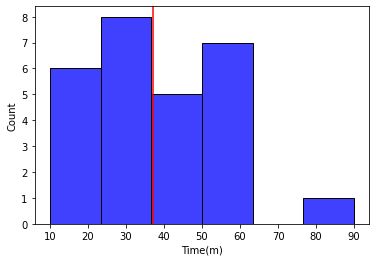

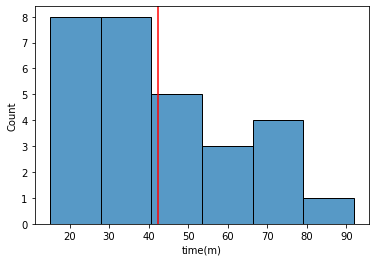

In [16]:
hist_plot=sns.histplot(x='time(m)', data=df)

mean=df['time(m)'].mean()

plt.axvline(mean, color='red')

plt.show()

My data is skewed right 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       29 non-null     datetime64[ns]
 1   course id  29 non-null     object        
 2   time(m)    29 non-null     int64         
 3   Day        29 non-null     int64         
 4   Day_Name   29 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ KB


### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
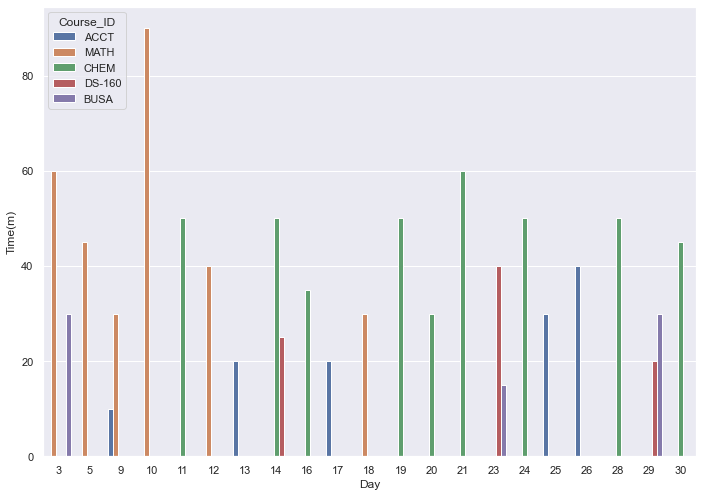

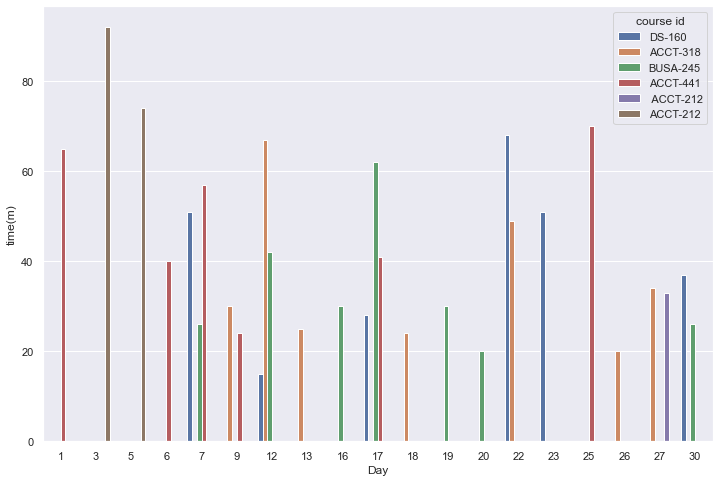

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot=sns.barplot(x='Day',y='time(m)',data=df, ci=False, hue='course id')

### Investigate the measure of dispersion (table and plot) of time column.
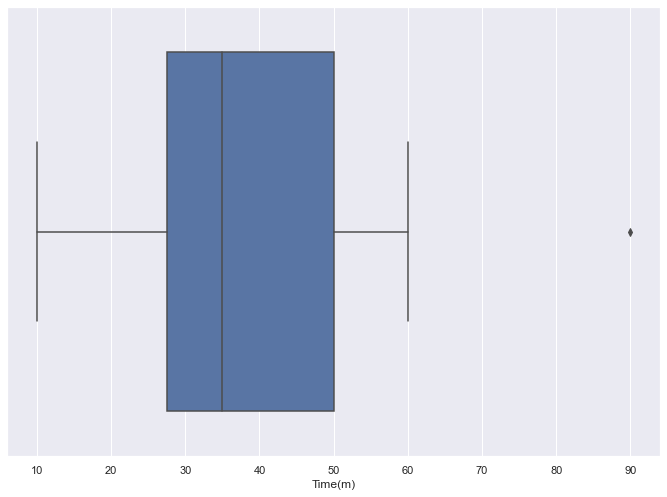

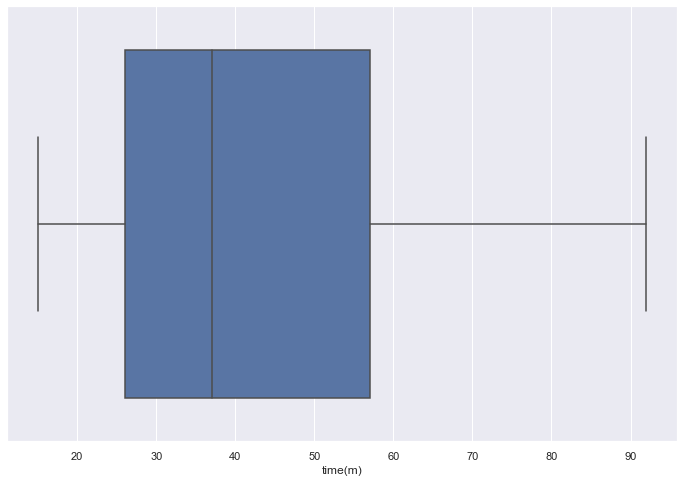

In [20]:
box_plot=sns.boxplot(x=df['time(m)'])

#### Q1 is just over 25 minutes and Q3 is just under an hour. There are no outliers in the data

### Investigate the the distribution of time by Day_name
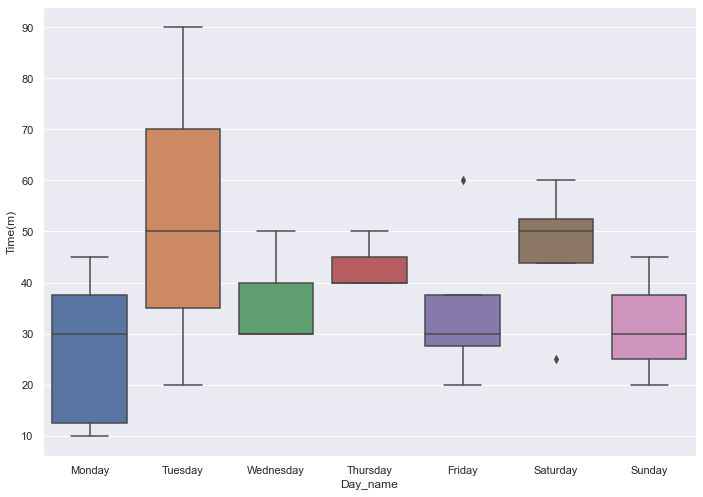

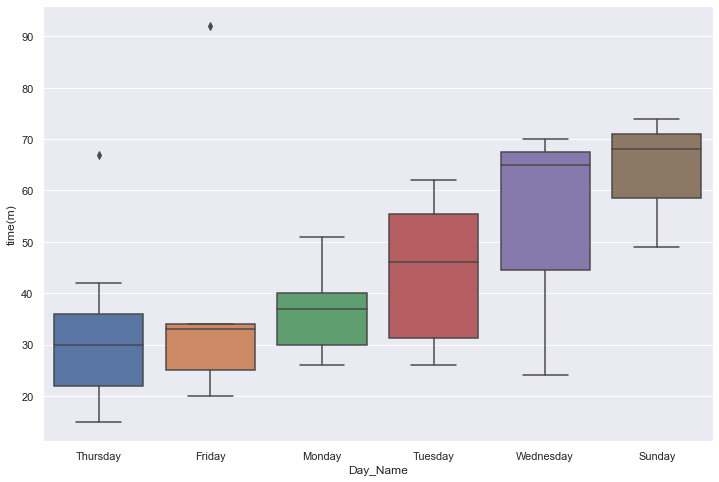

In [21]:
box_plot=sns.boxplot(x=df['Day_Name'], y=df['time(m)'])

It appears the days I studied the most were tuesday and wednesday yet on average I spent the longest time studying on sunday. 

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
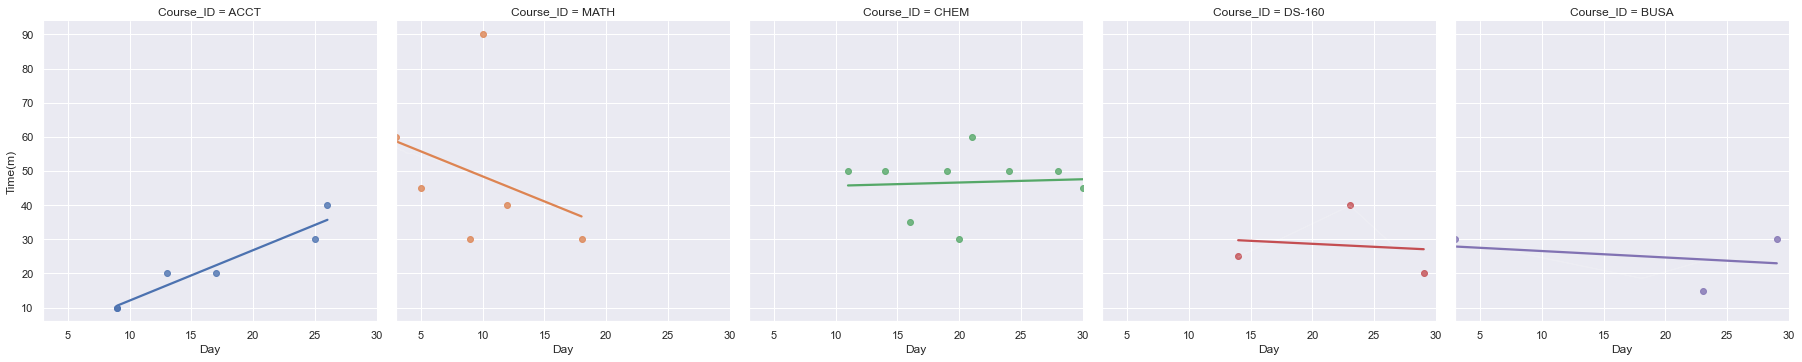

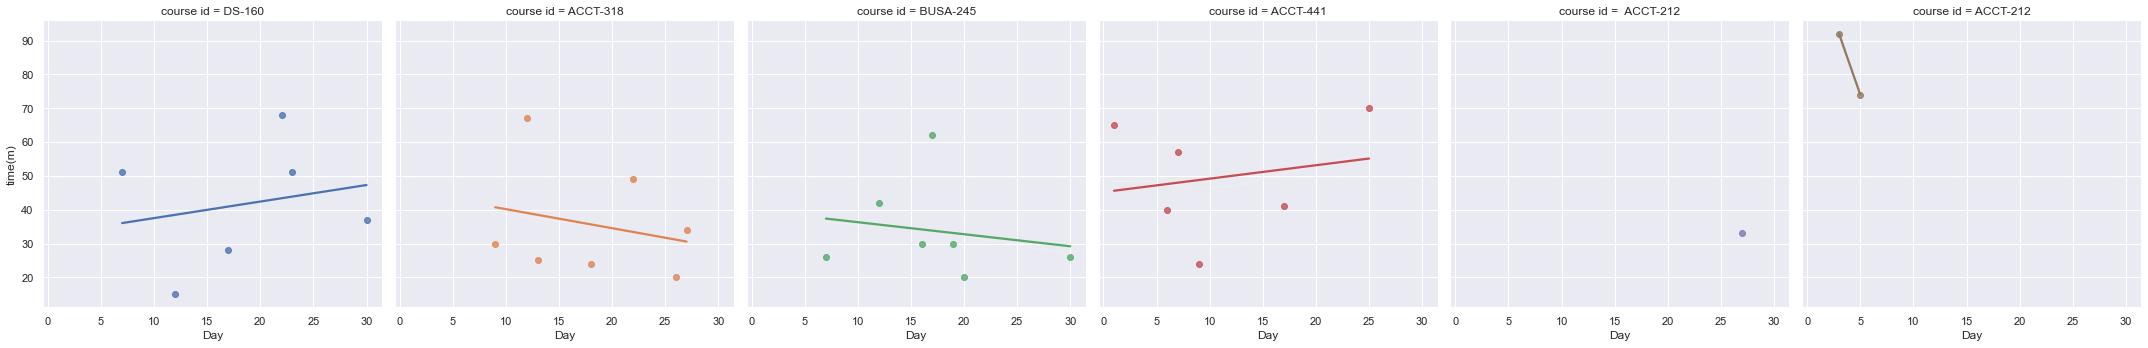

In [22]:
lmplot=sns.lmplot(x='Day', y='time(m)',data=df, hue='course id',ci=False,col='course id')

### Create a pair plot of Day and Time and add course id as hue
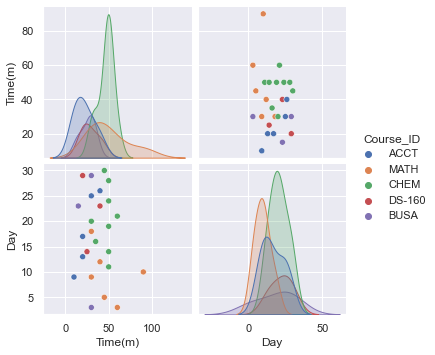

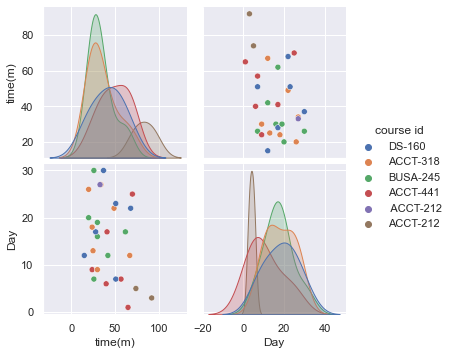

In [23]:
pair_plot=sns.pairplot(df,hue='course id')

### Display the Heatmap and comment on your findings
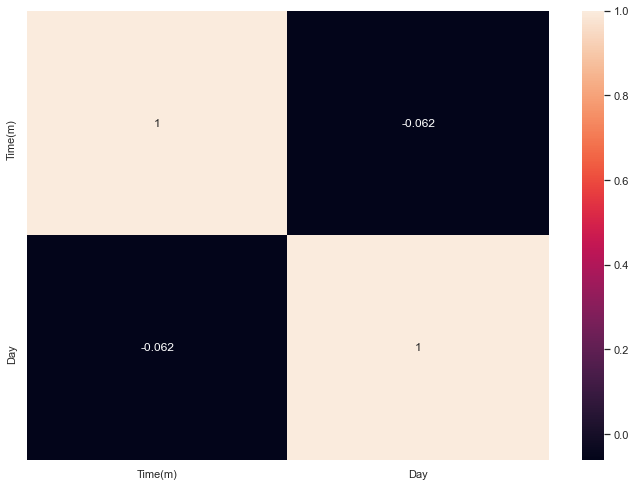

          time(m)       Day
time(m)  1.000000 -0.316329
Day     -0.316329  1.000000


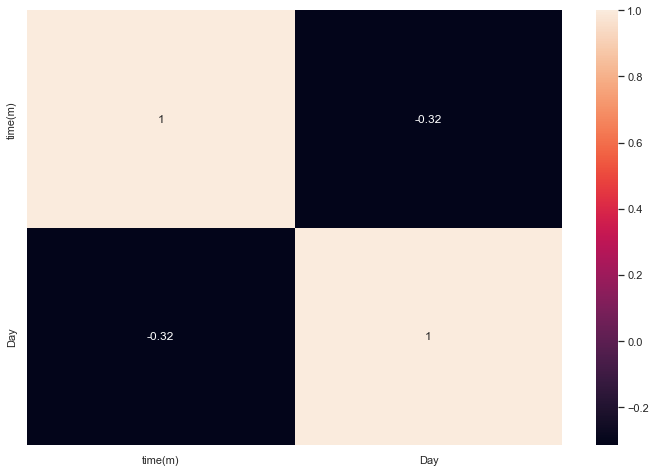

In [24]:
heat_map_corr=df[['time(m)','Day']].corr(method='pearson')
print(heat_map_corr)
cols=['time(m)','Day']
heat_map=sns.heatmap(heat_map_corr,annot=True,xticklabels=cols,yticklabels=cols)

#### Date and time learning have very low to no correlation. 